In [44]:
%matplotlib inline
import numpy as np

In [45]:
def fetch(url):
    import requests, gzip, os, hashlib, numpy
    fp = os.path.join("/tmp", hashlib.md5(url.encode('utf-8')).hexdigest())
    if os.path.isfile(fp):
        with open(fp, "rb") as f:
            dat = f.read()
    else:
        with open(fp, "wb") as f:
            dat = requests.get(url).content
            f.write(dat)
    return np.frombuffer(gzip.decompress(dat), dtype=np.uint8)

X_train = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[16:].reshape((-1, 28, 28)).astype(np.float32) / 255
Y_train = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
X_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[16:].reshape((-1, 28, 28)).astype(np.float32) / 255
Y_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]

In [49]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch import tensor
from tqdm import trange
import matplotlib.pyplot as plt

In [47]:
class SmolNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(28 * 28, 128)
        self.act = nn.ReLU()
        self.l2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.act(self.l1(x))
        x = self.l2(x)
        return x

model = SmolNet()

In [56]:
torch.empty(3, dtype=torch.long).random_(5)

tensor([2, 2, 1])

loss=0.06, acc=1.000000: 100%|██████████| 1000/1000 [00:01<00:00, 546.03it/s]


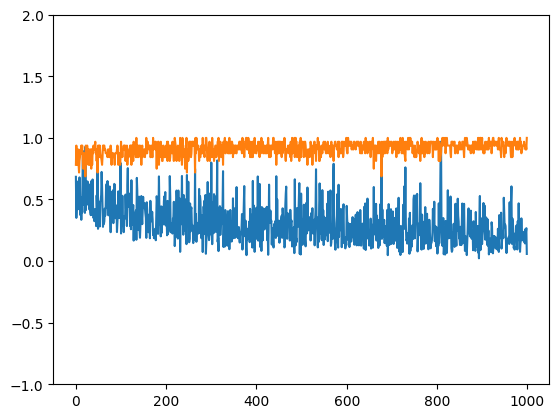

In [64]:
# train
BATCH = 32
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())
accuracies = []
losses = []
for i in (t := trange(1000)):
    samp = np.random.randint(0, X_train.shape[0], size=(BATCH))
    X = tensor(X_train[samp], requires_grad=True).reshape((-1, 28*28))
    Y = tensor(Y_train[samp]).long()

    optimizer.zero_grad()
    out = model(X)
    pred = out.argmax(axis=1)
    acc = (pred == Y).float().mean()
    #print(out, y)
    loss = loss_func(out, Y)
    #print(loss)
    loss.backward()
    optimizer.step()

    acc, loss = acc.item(), loss.item()

    accuracies.append(acc)
    losses.append(loss)

    t.set_description('loss={:.2f}, acc={:2f}'.format(loss, acc))

plt.ylim(-1, 2)
plt.plot(losses)
plt.plot(accuracies)


In [65]:
# evaluation
X = tensor(X_test).reshape((-1, 28*28))
Y = tensor(Y_test)
out = model(X)
pred = out.argmax(axis=1)
acc = (Y == pred).float().mean()
acc, X_test.shape[0]

(tensor(0.9365), 10000)

(<matplotlib.image.AxesImage at 0x16ab133a0>, 5)

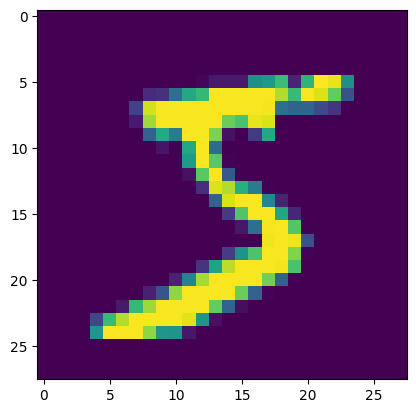

In [74]:
imshow(X_train[0]), Y_train[0]